# Final Project: Thyroid Peroxidase

##### Thyroid peroxidase is responsible for the biosynthesis of L-thyroxine and triiodo-L-thyronine. It catalyses both their iodination and coupling. However, different variants if the protein are associated with autoimmune hypothyroidism. Understanding the proteins structure and different isoforms is a valuable first approach at hypotheiszing how this is achieved. 


Github desktop

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
#Chunk 1
# Import cell 
# part 1:
from Bio.PDB import *
import nglview as nv
import ipywidgets
#part 2:
from Bio.PDB import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
# part 3:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProtParamData
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
# part 4: Importing 'Modeller'. This is a comparative protein structure modeling
#that predicts the 3D structure of a protein sequence based on known templates.
##The licence key for Modeller is: MODELIRANJE
from Bio.PDB import *
import nglview as nv
import ipywidgets
pdb_parser = PDBParser()
polypeptide_builder = CaPPBuilder()
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProtParamData
import sys
import os
from modeller import *
from modeller.optimizers import molecular_dynamics, conjugate_gradients
from modeller.automodel import autosched
from modeller import *
#From modeller also import selection.mutate
env = environ()
env.io.atom_files_directory = ['../atom_files']
# Read the topology library with non-hydrogen atoms only:
env.libs.topology.read(file='$(LIB)/top_heav.lib')
# Read the CHARMM parameter library:
env.libs.parameters.read(file='$(LIB)/par.lib')


                         MODELLER 10.4, 2022/10/28, r12463

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2022 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, WinNT 10.0 build 22621, DESKTOP-PTRB5IB, SMP, unknown
Date and time

##### Step 1.  
The first step of this analysis would be visualzing the wild type of the thryoid peroxidase enzyme. 
- The below structure corresponds to this enzyme which designated in uniprot as P07202. Its visualization is done through alpha fold, an artificial intelligence network developed by google AI with the objective of determining a proteins three dimensional structure from its amino acid sequence. 
- The protein is composed of 933 amino acids. 14 of these aa compose the signal peptide with the rest making up an extracellular domain, transmembrane domain, and short intracellular tail. The extracellular domain holds enzymatic acitivity as it encodes the heme binding region.  

In [3]:
#Chunk 2
pdb_parser = PDBParser()
structure = pdb_parser.get_structure("P", "TPO1.pdb")
view = nv.show_biopython(structure)
view

NGLWidget()

We can now look at its amino acid composition, hydrophobicity, and secondary structures. 
To study hydrophobicity the GRAVY value is included. This is the average hydropathy for the entered sequence and is calculated by adding the hydropathy value for each residue and dividing by the length of the sequence. A higher value GRAVY value is more hydrophobic and a lower value is more hydrophilic.

##### Wild Type TPO:

In [4]:
#Chunk 3
# Create empty list for chains
all_seqs = []
counter = 1
ppb=PPBuilder()
# For each polypeptide in the structure, run protein analysis methods and store in dict
for pp in ppb.build_peptides(structure):
    seq_info = {} # create an empty dict
    seq = pp.get_sequence() # get the sequence like above
    analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str 
    # Specify dict keys and values    
    seq_info['Sequence'] = seq # store BioPython Seq() object
    seq_info['Sequence Length'] = len(seq) # length of seq
    seq_info['Molecular Weight'] = analyzed_seq.molecular_weight()
    seq_info['GRAVY'] = analyzed_seq.gravy() # hydrophobicity 
    seq_info['AA Count'] = analyzed_seq.count_amino_acids() 
    seq_info['AA Percent'] = analyzed_seq.get_amino_acids_percent()
    # tuple of (helix, turn, sheet)
    seq_info['Secondary Structure'] = \
        analyzed_seq.secondary_structure_fraction()
    
    # Update all_seqs list and increase counter
    all_seqs.append(seq_info)
    counter += 1
    
all_seqs[0]

{'Sequence': Seq('MRALAVLSVTLVMACTEAFFPFISRGKELLWGKPEESRVSSVLEESKRLVDTAM...RAL'),
 'Sequence Length': 933,
 'Molecular Weight': 102961.53430000087,
 'GRAVY': -0.3391211146838148,
 'AA Count': {'A': 87,
  'C': 29,
  'D': 49,
  'E': 54,
  'F': 37,
  'G': 74,
  'H': 23,
  'I': 30,
  'K': 26,
  'L': 98,
  'M': 17,
  'N': 33,
  'P': 66,
  'Q': 40,
  'R': 69,
  'S': 63,
  'T': 56,
  'V': 43,
  'W': 19,
  'Y': 20},
 'AA Percent': {'A': 0.0932475884244373,
  'C': 0.031082529474812434,
  'D': 0.05251875669882101,
  'E': 0.05787781350482315,
  'F': 0.03965702036441586,
  'G': 0.07931404072883172,
  'H': 0.02465166130760986,
  'I': 0.03215434083601286,
  'K': 0.027867095391211148,
  'L': 0.10503751339764202,
  'M': 0.01822079314040729,
  'N': 0.03536977491961415,
  'P': 0.0707395498392283,
  'Q': 0.04287245444801715,
  'R': 0.07395498392282958,
  'S': 0.06752411575562701,
  'T': 0.06002143622722401,
  'V': 0.04608788853161844,
  'W': 0.020364415862808145,
  'Y': 0.021436227224008574},
 'Secondary

We see from these results that the protein has 933 amino acids with a molecular weight of 103014.5, a GRAVY value of -0.346 indicating its a hydrophilic protein, and similar proportions of secondary structures (helix, turn, sheet). 

##### Step 2. 
Having looked at the wild type we can now analyze three point mutants: 
- C808R
- G387R
- P499L

Because these are point mutations, significant 3D changes won't be visualized. However, the 'MODELL' function can be used to generate new pdb files with these mutations and then we can look at secondary structure and GRAVY values of these mutants to observe what structural changes the new mutants pose. 

In [5]:
#Chunk 4
#Read the original PDB file and copy its sequence to the alignment array:
code = 'TPO1.pdb'
aln = Alignment(env)
mdl = Model(env, file=code)
aln.append_model(mdl, atom_files=code, align_codes=code)

# Select the residues to be mutated: we're selecting residues 808, 387, and 499 
sel = Selection(mdl.residues['808:A'])

#Now we're mutating the residues as follows: 
#cysteine to arganine at 808
sel.mutate(residue_type='ARG')

# Add the mutated sequence to the alignment arrays (it is now the second
# sequence in the alignment):
aln.append_model(mdl, align_codes='TPO1-M1')

# Generate molecular topology for the mutant:
mdl.clear_topology()
mdl.generate_topology(aln['TPO1-M1'])

# Transfer all the coordinates you can from the template native structure
# to the mutant (this works even if the order of atoms in the native PDB
# file is not standard):
mdl.transfer_xyz(aln)


# Build the remaining unknown coordinates for the mutant:
mdl.build(initialize_xyz=False, build_method='INTERNAL_COORDINATES')

# Write the mutant to a file:
mdl.write(file='TPO-M1.pdb')



##### MUTANT 1:C808R
For the first mutant we generated a new pdb file where we replaced the cysteine for arginine and we now see the following: 

In [6]:
#Chunk 5
pdb_parser = PDBParser()
structure1 = pdb_parser.get_structure("P", "TPO-M1.pdb")
# Create empty list for chains
all_seqs = []
counter = 1
ppb=PPBuilder()
# For each polypeptide in the structure, run protein analysis methods and store in dict
for pp in ppb.build_peptides(structure1):
    seq_info = {} # create an empty dict
    seq = pp.get_sequence() # get the sequence like above
    analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str 
    # Specify dict keys and values    
    seq_info['Sequence'] = seq # store BioPython Seq() object
    seq_info['Sequence Length'] = len(seq) # length of seq
    seq_info['Molecular Weight'] = analyzed_seq.molecular_weight()
    seq_info['GRAVY'] = analyzed_seq.gravy() # hydrophobicity 
    seq_info['AA Count'] = analyzed_seq.count_amino_acids() 
    seq_info['AA Percent'] = analyzed_seq.get_amino_acids_percent()
    # tuple of (helix, turn, sheet)
    seq_info['Secondary Structure'] = \
        analyzed_seq.secondary_structure_fraction()
    
    # Update all_seqs list and increase counter
    all_seqs.append(seq_info)
    counter += 1
    
all_seqs[0]

C:\Users\whitn\anaconda3\envs\CSB1\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7246
  warnings.warn(


{'Sequence': Seq('MRALAVLSVTLVMACTEAFFPFISRGKELLWGKPEESRVSSVLEESKRLVDTAM...RAL'),
 'Sequence Length': 933,
 'Molecular Weight': 103014.57710000087,
 'GRAVY': -0.3466237942122178,
 'AA Count': {'A': 87,
  'C': 28,
  'D': 49,
  'E': 54,
  'F': 37,
  'G': 74,
  'H': 23,
  'I': 30,
  'K': 26,
  'L': 98,
  'M': 17,
  'N': 33,
  'P': 66,
  'Q': 40,
  'R': 70,
  'S': 63,
  'T': 56,
  'V': 43,
  'W': 19,
  'Y': 20},
 'AA Percent': {'A': 0.0932475884244373,
  'C': 0.030010718113612004,
  'D': 0.05251875669882101,
  'E': 0.05787781350482315,
  'F': 0.03965702036441586,
  'G': 0.07931404072883172,
  'H': 0.02465166130760986,
  'I': 0.03215434083601286,
  'K': 0.027867095391211148,
  'L': 0.10503751339764202,
  'M': 0.01822079314040729,
  'N': 0.03536977491961415,
  'P': 0.0707395498392283,
  'Q': 0.04287245444801715,
  'R': 0.07502679528403002,
  'S': 0.06752411575562701,
  'T': 0.06002143622722401,
  'V': 0.04608788853161844,
  'W': 0.020364415862808145,
  'Y': 0.021436227224008574},
 'Secondary

We can now repeat for the other two mutants:

##### MUTANT 2: G387R

In [7]:
#Chunk 6
#Read the original PDB file and copy its sequence to the alignment array:
code = 'TPO1.pdb'
aln = Alignment(env)
mdl = Model(env, file=code)
aln.append_model(mdl, atom_files=code, align_codes=code)

# Select the residues to be mutated: we're selecting residues 808, 387, and 499 
sel = Selection(mdl.residues['387:A'])

#Now we're mutating the residues as follows: 
#glycine to arganine at 387
sel.mutate(residue_type='ARG')

# Add the mutated sequence to the alignment arrays (it is now the second
# sequence in the alignment):
aln.append_model(mdl, align_codes='TPO1-M2')

# Generate molecular topology for the mutant:
mdl.clear_topology()
mdl.generate_topology(aln['TPO1-M2'])

# Transfer all the coordinates you can from the template native structure
# to the mutant (this works even if the order of atoms in the native PDB
# file is not standard):
mdl.transfer_xyz(aln)

# Build the remaining unknown coordinates for the mutant:
mdl.build(initialize_xyz=False, build_method='INTERNAL_COORDINATES')

# Write the mutant to a file:
mdl.write(file='TPO-M2.pdb')

pdb_parser = PDBParser()
structure2 = pdb_parser.get_structure("P", "TPO-M2.pdb")
# Create empty list for chains
all_seqs = []
counter = 1
ppb=PPBuilder()
# For each polypeptide in the structure, run protein analysis methods and store in dict
for pp in ppb.build_peptides(structure2):
    seq_info = {} # create an empty dict
    seq = pp.get_sequence() # get the sequence like above
    analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str 
    # Specify dict keys and values    
    seq_info['Sequence'] = seq # store BioPython Seq() object
    seq_info['Sequence Length'] = len(seq) # length of seq
    seq_info['Molecular Weight'] = analyzed_seq.molecular_weight()
    seq_info['GRAVY'] = analyzed_seq.gravy() # hydrophobicity 
    seq_info['AA Count'] = analyzed_seq.count_amino_acids() 
    seq_info['AA Percent'] = analyzed_seq.get_amino_acids_percent()
    # tuple of (helix, turn, sheet)
    seq_info['Secondary Structure'] = \
        analyzed_seq.secondary_structure_fraction()
    
    # Update all_seqs list and increase counter
    all_seqs.append(seq_info)
    counter += 1
    
all_seqs[0]

C:\Users\whitn\anaconda3\envs\CSB1\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7248
  warnings.warn(


{'Sequence': Seq('MRALAVLSVTLVMACTEAFFPFISRGKELLWGKPEESRVSSVLEESKRLVDTAM...RAL'),
 'Sequence Length': 933,
 'Molecular Weight': 103060.66870000087,
 'GRAVY': -0.34351554126473655,
 'AA Count': {'A': 87,
  'C': 29,
  'D': 49,
  'E': 54,
  'F': 37,
  'G': 73,
  'H': 23,
  'I': 30,
  'K': 26,
  'L': 98,
  'M': 17,
  'N': 33,
  'P': 66,
  'Q': 40,
  'R': 70,
  'S': 63,
  'T': 56,
  'V': 43,
  'W': 19,
  'Y': 20},
 'AA Percent': {'A': 0.0932475884244373,
  'C': 0.031082529474812434,
  'D': 0.05251875669882101,
  'E': 0.05787781350482315,
  'F': 0.03965702036441586,
  'G': 0.0782422293676313,
  'H': 0.02465166130760986,
  'I': 0.03215434083601286,
  'K': 0.027867095391211148,
  'L': 0.10503751339764202,
  'M': 0.01822079314040729,
  'N': 0.03536977491961415,
  'P': 0.0707395498392283,
  'Q': 0.04287245444801715,
  'R': 0.07502679528403002,
  'S': 0.06752411575562701,
  'T': 0.06002143622722401,
  'V': 0.04608788853161844,
  'W': 0.020364415862808145,
  'Y': 0.021436227224008574},
 'Secondary

##### MUTANT 3: P499L

In [8]:
#Read the original PDB file and copy its sequence to the alignment array:
code = 'TPO1.pdb'
aln = Alignment(env)
mdl = Model(env, file=code)
aln.append_model(mdl, atom_files=code, align_codes=code)

# Select the residues to be mutated: we're selecting residues 808, 387, and 499 
sel = Selection(mdl.residues['499:A'])

#Now we're mutating the residues as follows: 
#glycine to arganine at 387
sel.mutate(residue_type='LEU')

# Add the mutated sequence to the alignment arrays (it is now the second
# sequence in the alignment):
aln.append_model(mdl, align_codes='TPO1-M3')

# Generate molecular topology for the mutant:
mdl.clear_topology()
mdl.generate_topology(aln['TPO1-M3'])

# Transfer all the coordinates you can from the template native structure
# to the mutant (this works even if the order of atoms in the native PDB
# file is not standard):
mdl.transfer_xyz(aln)

# Build the remaining unknown coordinates for the mutant:
mdl.build(initialize_xyz=False, build_method='INTERNAL_COORDINATES')

# Write the mutant to a file:
mdl.write(file='TPO-M3.pdb')

pdb_parser = PDBParser()
structure3 = pdb_parser.get_structure("P", "TPO-M3.pdb")
# Create empty list for chains
all_seqs = []
counter = 1
ppb=PPBuilder()
# For each polypeptide in the structure, run protein analysis methods and store in dict
for pp in ppb.build_peptides(structure2):
    seq_info = {} # create an empty dict
    seq = pp.get_sequence() # get the sequence like above
    analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str 
    # Specify dict keys and values    
    seq_info['Sequence'] = seq # store BioPython Seq() object
    seq_info['Sequence Length'] = len(seq) # length of seq
    seq_info['Molecular Weight'] = analyzed_seq.molecular_weight()
    seq_info['GRAVY'] = analyzed_seq.gravy() # hydrophobicity 
    seq_info['AA Count'] = analyzed_seq.count_amino_acids() 
    seq_info['AA Percent'] = analyzed_seq.get_amino_acids_percent()
    # tuple of (helix, turn, sheet)
    seq_info['Secondary Structure'] = \
        analyzed_seq.secondary_structure_fraction()
    
    # Update all_seqs list and increase counter
    all_seqs.append(seq_info)
    counter += 1
    
all_seqs[0]

C:\Users\whitn\anaconda3\envs\CSB1\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7242
  warnings.warn(


{'Sequence': Seq('MRALAVLSVTLVMACTEAFFPFISRGKELLWGKPEESRVSSVLEESKRLVDTAM...RAL'),
 'Sequence Length': 933,
 'Molecular Weight': 103060.66870000087,
 'GRAVY': -0.34351554126473655,
 'AA Count': {'A': 87,
  'C': 29,
  'D': 49,
  'E': 54,
  'F': 37,
  'G': 73,
  'H': 23,
  'I': 30,
  'K': 26,
  'L': 98,
  'M': 17,
  'N': 33,
  'P': 66,
  'Q': 40,
  'R': 70,
  'S': 63,
  'T': 56,
  'V': 43,
  'W': 19,
  'Y': 20},
 'AA Percent': {'A': 0.0932475884244373,
  'C': 0.031082529474812434,
  'D': 0.05251875669882101,
  'E': 0.05787781350482315,
  'F': 0.03965702036441586,
  'G': 0.0782422293676313,
  'H': 0.02465166130760986,
  'I': 0.03215434083601286,
  'K': 0.027867095391211148,
  'L': 0.10503751339764202,
  'M': 0.01822079314040729,
  'N': 0.03536977491961415,
  'P': 0.0707395498392283,
  'Q': 0.04287245444801715,
  'R': 0.07502679528403002,
  'S': 0.06752411575562701,
  'T': 0.06002143622722401,
  'V': 0.04608788853161844,
  'W': 0.020364415862808145,
  'Y': 0.021436227224008574},
 'Secondary

When comparing the three mutants we can look at the amino acid compositions to confirm that code actually led to changes in amino acid composition. Furthermore, we can look at the GRAVY and secondary structure values to observed how these changes might of had affected biochemical interactions. 

- In the first mutant, we in fact see the C808R point mutation. The molecular weight of the protein increases to 103060.6 (WT = 102961.5), and its GRAVY values decreases to -0.343529 ( WT -0.3391), indicating its more hydrophobic. The secondary structure proportions are helix:0.2647 (WT=0.2647) turn:0.2518 (WT=0.2529) sheet:0.274 (WT=0.274). 

- In the second mutant, we also see the point mutation, a molecular weight of 103060.7, a GRAVY value of -0.343515, and secondary structure porportions of helix: 0.2647, turn: 0.2518, and sheet: 0.274. 

- In the third mutant, we also see the point mutation, a molecular weight of 103060.6, a GRAVY value of -0.3435152, and secondary structure porportions of helix: 0.2647, turn: 0.2518, sheet: 0.2743. 

From these results we see a general trend of mutants having a higher molecular weight, becoming more hydrophilic, and reduced proportions of beta sheets in their secondary structure. 


## PART 2:

##### We can now correlate these mutations and changed in hydrophobicity with enzyme kinetics. The paper shows the kinetic constant values for the different variants which we can model according to the Michaelis-Menten equation.

Looking at the paper we see the following values:
    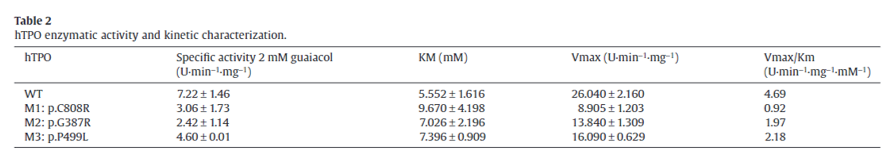
    

From here we derive the KM, and Vmax values. Initial [E0] is stated in the paper and can be used to determine the value at 0.01875 um. We can therefore use these values to evaluate michaelis-menten for WT TPO vs its mutants. 

In [9]:
# KM 
K_M_WT = 5.552
K_M_M1 = 9.670
K_M_M2 = 7.026
K_M_M3 = 7.396
#V max 
V_max_WT=26.040
V_max_M1=8.905
V_max_M2=13.840
V_max_M3=16.090

# E_0
E_0 = 10e-3

# K_cat for WT and mutants
K_cat_WT=V_max_WT/E_0
K_cat_M1=V_max_M1/E_0
K_cat_M2=V_max_M2/E_0
K_cat_M3=V_max_M3/E_0

# ODE
def MM_dynamics(t,y,K_cat_WT,K_M_WT,E_0):
    # y[0] = B product
    # y[1] = A reactant
    dydt = np.zeros(2)
    v = K_cat_WT*E_0*(y[1]/(K_M_WT+y[1]))
    dydt[0] = v
    dydt[1] = -v
    return dydt

def MM_dynamics_M1(t,y,K_cat_M1,K_M_M1,E_0):
    # y[0] = B product
    # y[1] = A reactant
    dydt_1 = np.zeros(2)
    v = K_cat_M1*E_0*(y[1]/(K_M_M1+y[1]))
    dydt_1[0] = v
    dydt_1[1] = -v
    return dydt_1

def MM_dynamics_M2(t,y,K_cat_M2,K_M_M2,E_0):
    # y[0] = B product
    # y[1] = A reactant
    dydt_2 = np.zeros(2)
    v = K_cat_M2*E_0*(y[1]/(K_M_M2+y[1]))
    dydt_2[0] = v
    dydt_2[1] = -v
    return dydt_2

def MM_dynamics_M3(t,y,K_cat_M3,K_M_M3,E_0):
    # y[0] = B product
    # y[1] = A reactant
    dydt_3 = np.zeros(2)
    v = K_cat_M3*E_0*(y[1]/(K_M_M3+y[1]))
    dydt_3[0] = v
    dydt_3[1] = -v
    return dydt_3

In [10]:
# Initial Conditions
y0 = [0,50]
# time span
t = np.linspace(1,15,100)
tspan = [t[0],t[-1]]

ode_sol_WT = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat_WT,K_M_WT,E_0),tspan,y0,t_eval=t)
ode_sol_M1 = solve_ivp(lambda t,y:MM_dynamics_M1(t,y,K_cat_M1,K_M_M1,E_0),tspan,y0,t_eval=t)
ode_sol_M2 = solve_ivp(lambda t,y:MM_dynamics_M2(t,y,K_cat_M2,K_M_M2,E_0),tspan,y0,t_eval=t)
ode_sol_M3 = solve_ivp(lambda t,y:MM_dynamics_M3(t,y,K_cat_M3,K_M_M3,E_0),tspan,y0,t_eval=t)

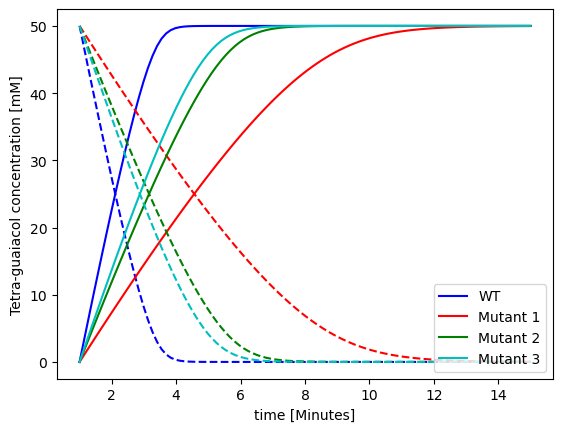

In [11]:
plt.plot(t,ode_sol_WT.y[0],'b', label= 'WT')
plt.plot(t,ode_sol_WT.y[1],'b--')

plt.plot(t,ode_sol_M1.y[0],'r', label= 'Mutant 1')
plt.plot(t,ode_sol_M1.y[1],'r--')

plt.plot(t,ode_sol_M2.y[0],'g', label= 'Mutant 2')
plt.plot(t,ode_sol_M2.y[1],'g--')

plt.plot(t,ode_sol_M3.y[0],'c', label= 'Mutant 3')
plt.plot(t,ode_sol_M3.y[1],'c--')


plt.xlabel('time [Minutes]')
plt.ylabel('Tetra-guaiacol concentration [mM]')
leg = plt.legend(loc='lower right')

##### MM plot

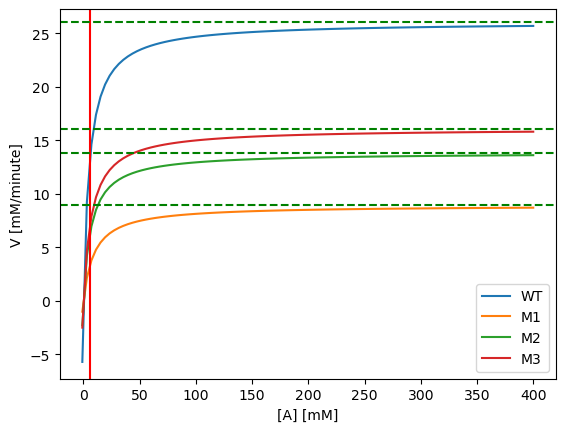

In [12]:
# Calculate rates from MM equation
# Range of reactant concentrations
A = np.linspace(-1,400,100)
v1 = K_cat_WT*E_0*(A/(K_M_WT+A))
v2 = K_cat_M1*E_0*(A/(K_M_M1+A))
v3 = K_cat_M2*E_0*(A/(K_M_M2+A))
v4 = K_cat_M3*E_0*(A/(K_M_M3+A))
# plot
plt.plot(A,v1, label= 'WT')
plt.plot(A,v2, label= 'M1')
plt.plot(A,v3, label= 'M2')
plt.plot(A,v4, label= 'M3')
plt.axvline(x=K_M_WT, color='r', linestyle='-')
plt.axhline(y=K_cat_WT*E_0, color='g', linestyle='--')
plt.axhline(y=K_cat_M1*E_0, color='g', linestyle='--')
plt.axhline(y=K_cat_M2*E_0, color='g', linestyle='--')
plt.axhline(y=K_cat_M3*E_0, color='g', linestyle='--')
plt.xlabel('[A] [mM]')
plt.ylabel('V [mM/minute]')
leg = plt.legend(loc='lower right')

We see from this graph that the reaction rate (V) increases similarly for all variants. However, Kcat/E0 values are lowest for M1<M2<M3. 

##### Lineweaver-Burk

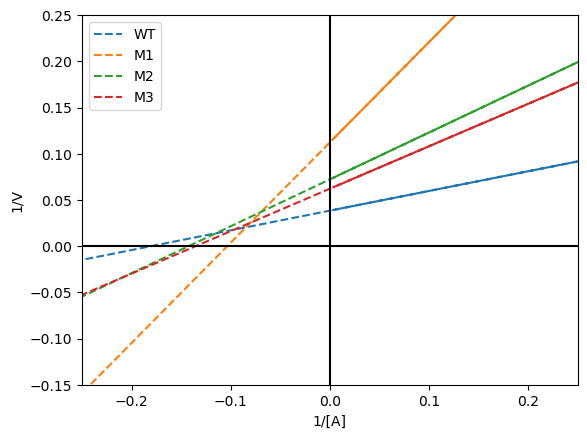

In [13]:
# plot
np.seterr(divide='ignore')
plt.plot(1/A,1/v1,label= 'WT',linestyle='--') #don't t plot the first point at 0 
plt.plot(1/A,1/v2,label= 'M1',linestyle='--')
plt.plot(1/A,1/v3,label= 'M2',linestyle='--')
plt.plot(1/A,1/v4,label= 'M3',linestyle='--')

plt.ylim(-0.15,0.25)
plt.xlim(-0.25,0.25)

plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

plt.xlabel('1/[A]')
plt.ylabel('1/V')
leg = plt.legend(loc='upper left')

The Lineweaver-Burk is a double reciprocal that shows us all the WT's have reduced Km and Vmax but also see the slopes increasing for all mutants. 

From these results we see the mutants having lower kinetic activity, taking significantly longer to catalyze the conversion of guaiacol to tetra guaiacol. Noticeably, M2 and M3 are more closely related in kinetic values than M1 which is significantly affected by the C808R mutation. 